In [305]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize



In [306]:
data=pd.read_csv('/Users/anirudhgokamalla/Desktop/AnirudhProj/ML models/spam.csv',encoding='latin1')

In [307]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')
enc=LabelEncoder()
data['label']=enc.fit_transform(data['v1'])
data=data.rename(columns={'v2':'text'})
data=data.drop('v1',axis='columns')

In [308]:
data['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [309]:
import nltk
nltk.download('all')
nltk.data.path.append('/Users/anirudhgokamalla/nltk_data')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/anirudhgokamalla/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/anirudhgokamalla/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/anirudhgokamalla/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/anirudhgokamalla/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/anirudhgokamalla/nltk_data...
[nltk_data]    |   Package averaged_

In [310]:
data["num_characters"]=data['text'].apply(len)

In [311]:
data

,text,label,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


In [312]:
data["num_words"]=data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [313]:
data["num_sentences"]=data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [314]:
data

,text,label,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


<Axes: xlabel='num_characters', ylabel='Count'>

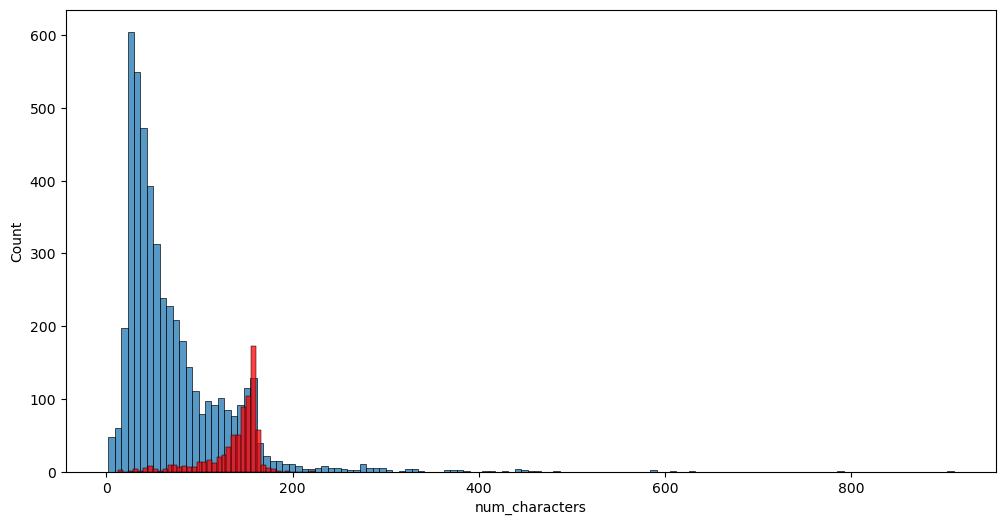

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(data[data["label"] == 0]['num_characters'])
sns.histplot(data[data["label"] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

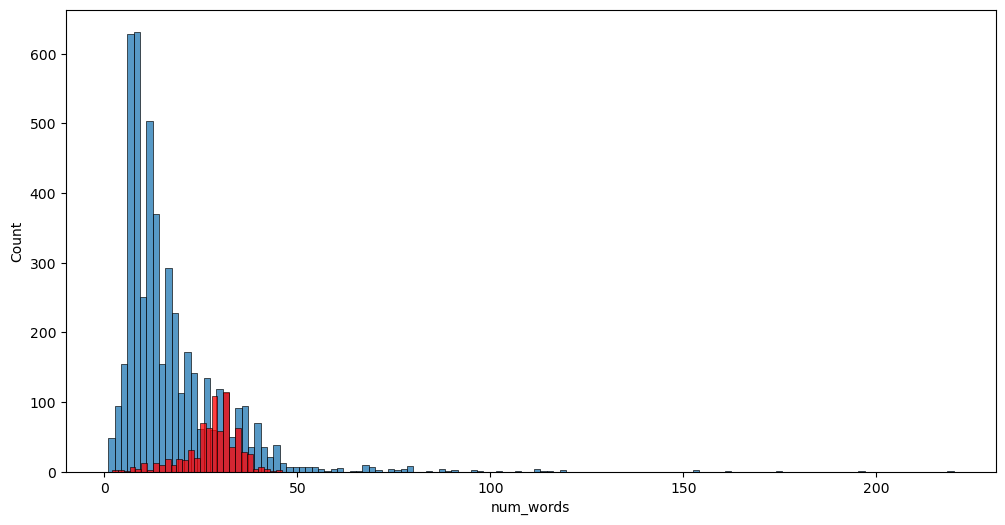

In [316]:
plt.figure(figsize=(12,6))
sns.histplot(data[data["label"] == 0]['num_words'])
sns.histplot(data[data["label"] == 1]['num_words'],color='red')

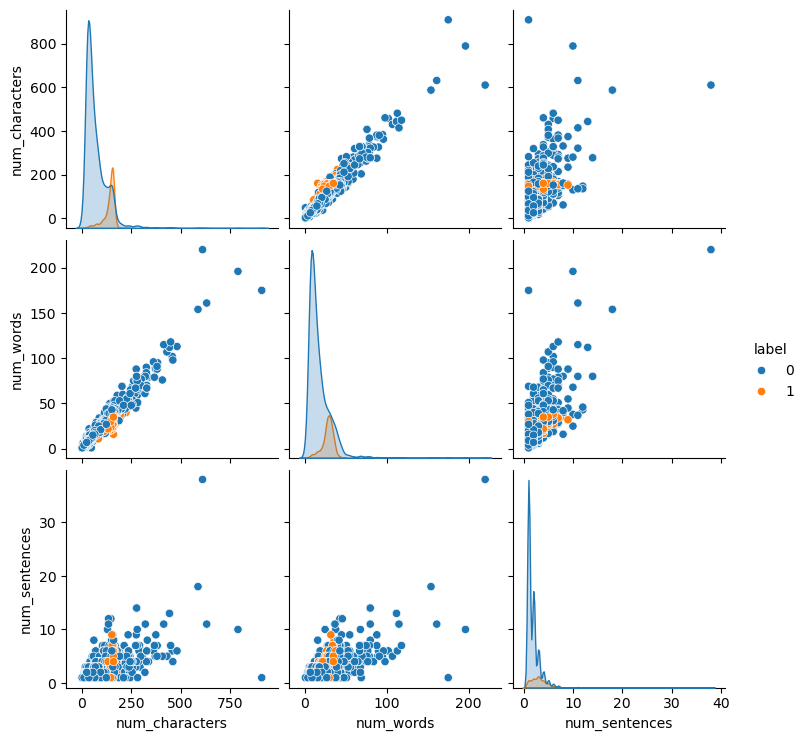

In [317]:
sns.pairplot(data,hue='label')

<Axes: >

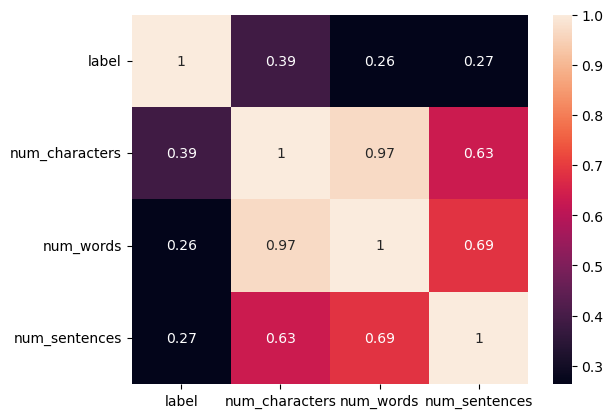

In [318]:
sns.heatmap(data.drop('text',axis=1).corr(),annot=True)

In [319]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [320]:
def transfrom_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)



In [321]:
data["transformed_text"]=data["text"].apply(transfrom_text)

In [322]:
data.head()

,text,label,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [323]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(data[data['label'] == 1]['transformed_text'].str.cat(sep=" "))

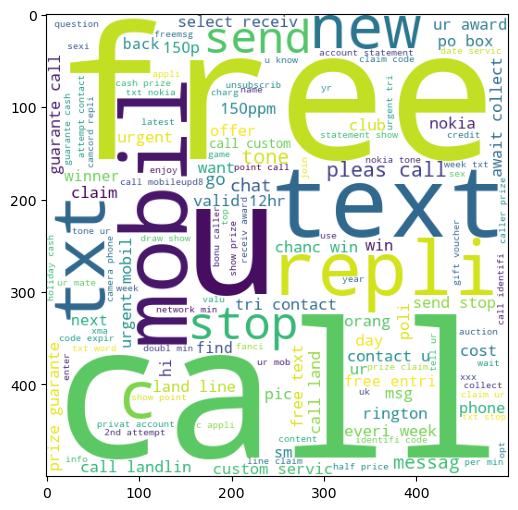

In [324]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

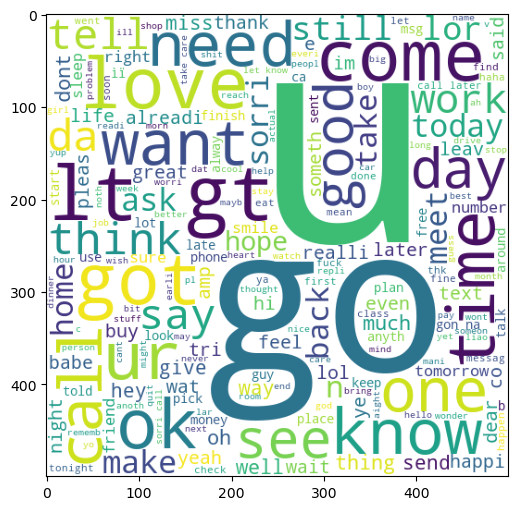

In [325]:
ham_wc=wc.generate(data[data['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [326]:
spam_corpus=[]
for msg in data[data['label'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [327]:
len(spam_corpus)

11490

/var/folders/p0/psf9flvd2wlfhmfwkwqckd740000gn/T/ipykernel_63269/3358537936.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


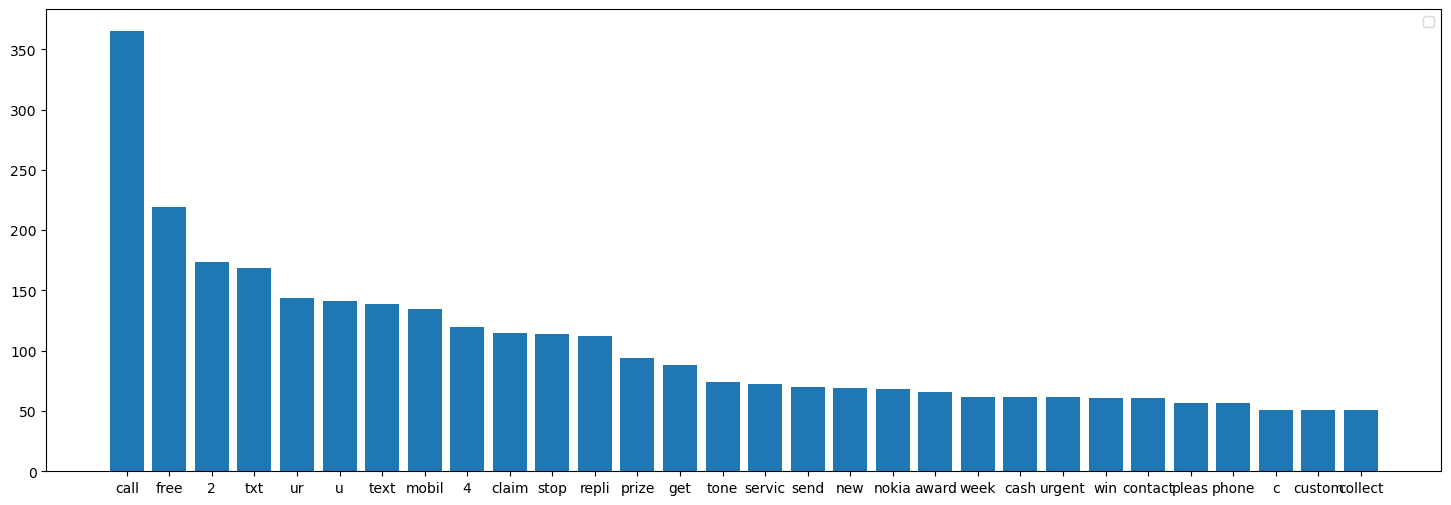

In [328]:
from collections import Counter
plt.figure(figsize=(18,6))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1] )
plt.legend()
plt.show()

## Model Building

In [350]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [351]:
X=tf.fit_transform(data['transformed_text']).toarray()

In [352]:
y=data['label'].values

In [353]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [354]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [355]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [356]:
mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)

In [357]:
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

0.9775784753363229
1.0
[[965   0]
 [ 25 125]]
